# Predicting Thyroid Cancer Recurrence - EDA

## The dataset

This dataset was collated as part of the study completed by Borzooei et al. (2023) to explore the possibility to training machine learning models to predict the likelihood of recurrence of well-differentiated thyroid cancer. 383 patients were a part of the study and were observed for 10 years within a period of 15 years.

Below are the columns included in the dataset and what they represent:

- Age: Patient's age.
- Gender: Patient's gender.
- Smoking: Smoking status (binary).
- Hx Smoking: History of smoking (binary).
- Hx Radiotherapy: History of radiotherapy (binary).
- Thyroid Function: Thyroid function details.
- Physical Examination: Results of physical examination.
- Adenopathy: Presence of adenopathy (binary).
- Pathology: Pathology details.
- Focality: Focality information.
- Risk: Risk assessment.
- T, N, M, Stage: Cancer staging attributes.
- Response: Response details.
- Recurred: Dependent variable indicating recurrence (binary).

## 1. Imports and Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_923/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = "../data/raw/Thyroid_Diff.csv"
df = pd.read_csv(file_path)

## 2. Initial Exploration

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

There are no missing values and all bar Age are categorical features. Encoding will be required to handle the categorical features. Exploration of feature seection techniques may be required as following encoding there will be a lot of features compared to the number of observations present in the dataset.

In [6]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


The average patient age is approximately 41, with the youngest being 15 and oldest being 82. Median age is 37, which is relatively close to the mean. 

Question: Is age the age of the patient at the start of observation? _Age refers to age at diagnosis_

In [7]:
df.shape

(383, 17)

In [8]:
df.duplicated().sum()

19

It appears there are duplicates, however as there is many categorical features, I believe they are false duplicates (patients that fall into identical categories).

> How should this scenario be handled? My gut is to keep them as we don't have many observations to start with.

In [9]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [10]:
# What are the categories in each feature
cat_features = df.drop(['Recurred', 'Age'], axis=1)
columns = cat_features.columns

for col in columns:
    print(f"Categories in {col}: {cat_features[col].unique()}")

Categories in Gender: ['F' 'M']
Categories in Smoking: ['No' 'Yes']
Categories in Hx Smoking: ['No' 'Yes']
Categories in Hx Radiothreapy: ['No' 'Yes']
Categories in Thyroid Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Categories in Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Categories in Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Categories in Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Categories in Focality: ['Uni-Focal' 'Multi-Focal']
Categories in Risk: ['Low' 'Intermediate' 'High']
Categories in T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
Categories in N: ['N0' 'N1b' 'N1a']
Categories in M: ['M0' 'M1']
Categories in Stage: ['I' 'II' 'IVB' 'III' 'IVA']
Categories in Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomple

## 3. Univariate Analysis

In this section the distribution of the features will be explored.

In [57]:
def plot_categorical_feature(feature_name: str, explode: list):
    """Plots Count plot and pie chart

    Args:
        feature_name (str): This should correspond to the feature column name to be explored.
        explode (list): This is a list of len(number of feature categories) which specifies the fraction of the radius with which to offset each wedge.
    """
    f,ax=plt.subplots(1,2,figsize=(20,10))
    sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)


    for container in ax[0].containers:
        ax[0].bar_label(container,color='black',size=20)
        ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
    
    plt.pie(x=df[feature_name].value_counts(),labels=df[feature_name].unique(),explode=explode,autopct='%1.1f%%',shadow=True)
    plt.show()

#### Age distribution

Plot a historgram to see where the best splits for age would be when we discretise that feature.

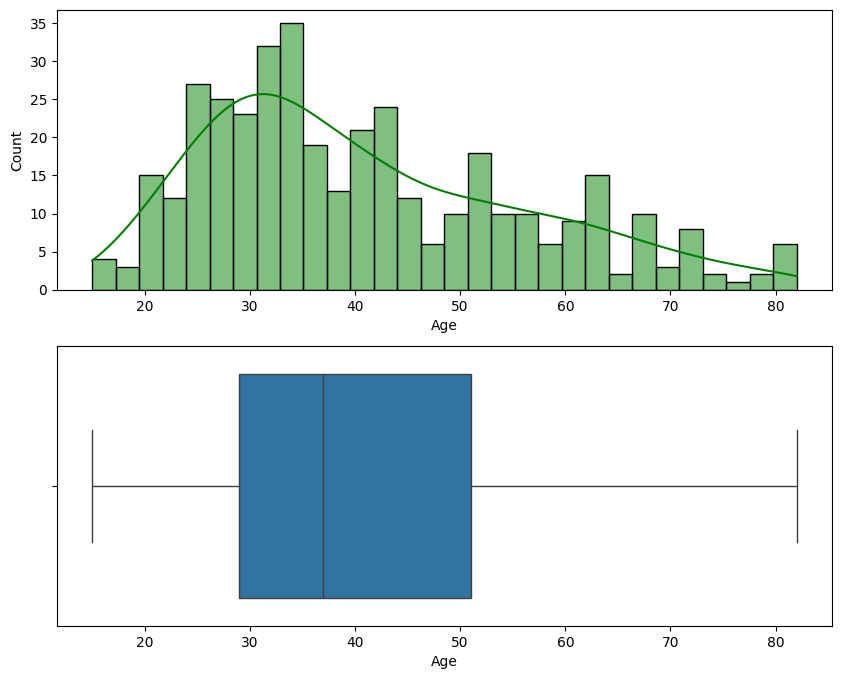

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(211)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(212)
sns.boxplot(data=df, x='Age')
plt.show()

### Gender distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


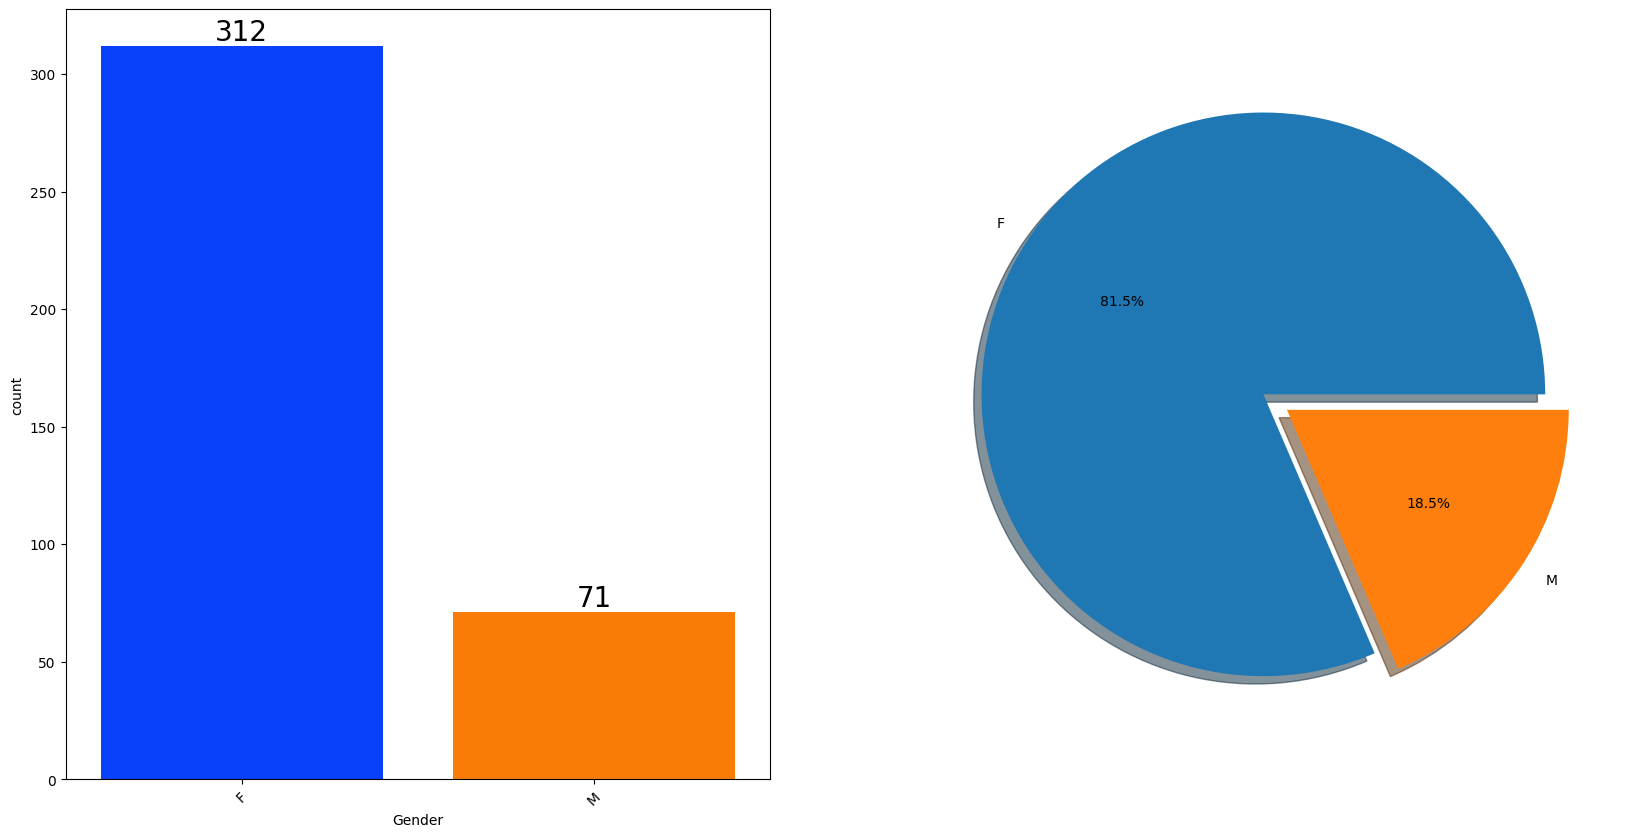

In [58]:
plot_categorical_feature("Gender", [0,0.1])

#### Insights

The dataset predominantly comprises female patients (81.5%) compared to male patients (18.5%). Given thyroid cancer's higher prevalence in females, this distribution aligns with existing epidemiological trends and emphasizes the importance of gender-specific considerations in recurrence prediction models.

### Smoking distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


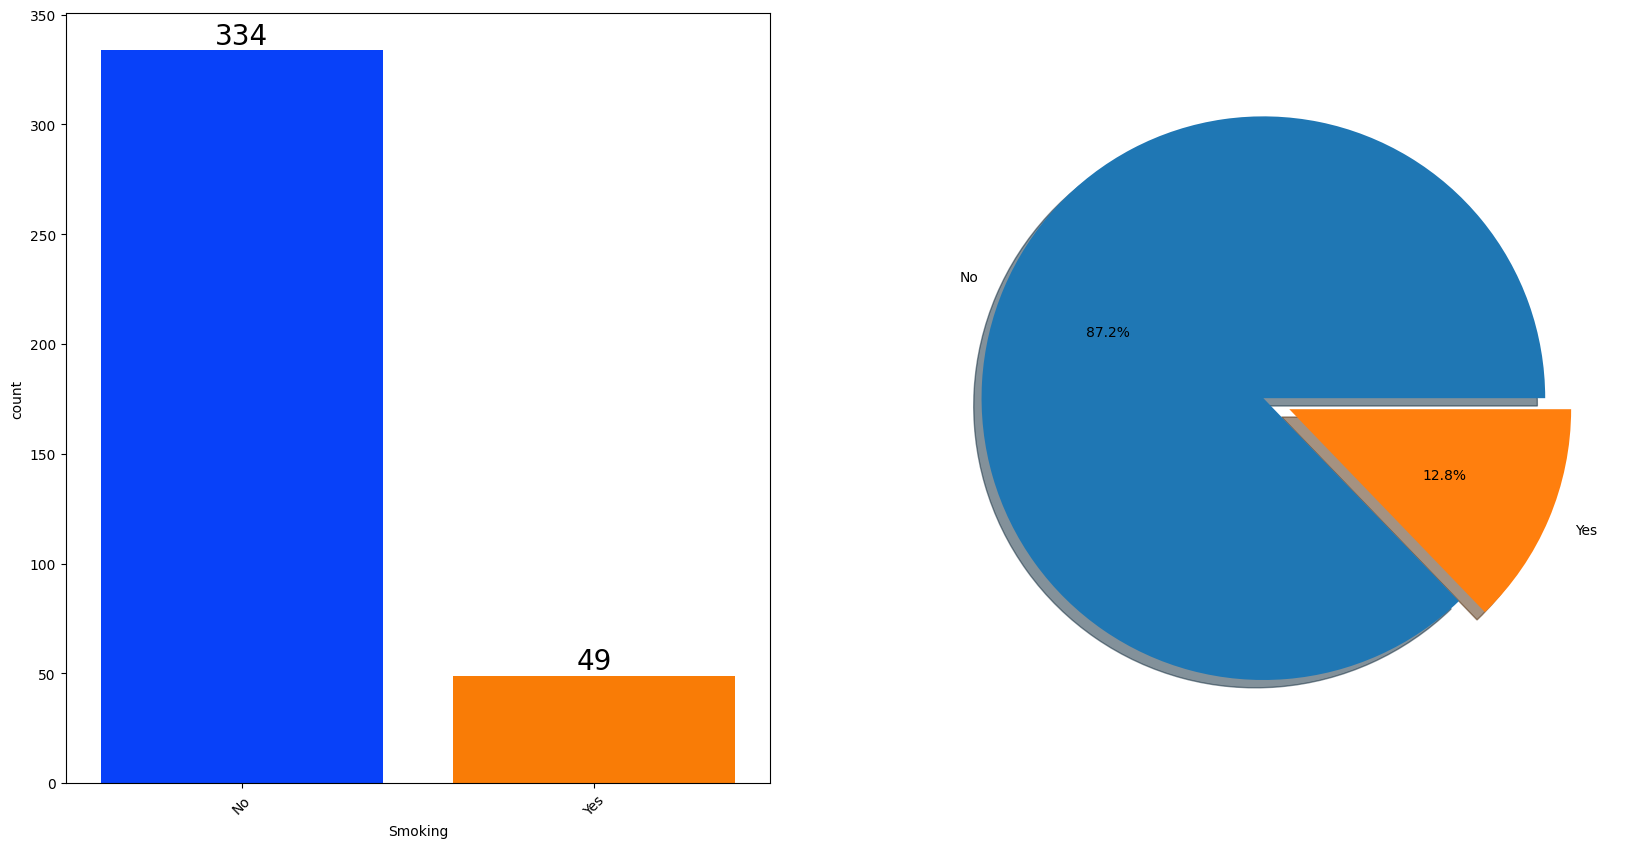

In [59]:
plot_categorical_feature("Smoking", [0,0.1])

#### Insights


The majority of patients in the study are nonsmokers (87.2%), while a smaller proportion are smokers (12.8%). This suggests that smoking might not be a predominant risk factor for thyroid cancer recurrence in this cohort, potentially prompting further investigation into other contributing factors.

### Hx Smoking Distribution

> Are these patients that have smoked in the past but currently are not smokers? (excluding those who answered yes to the previous question?)

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


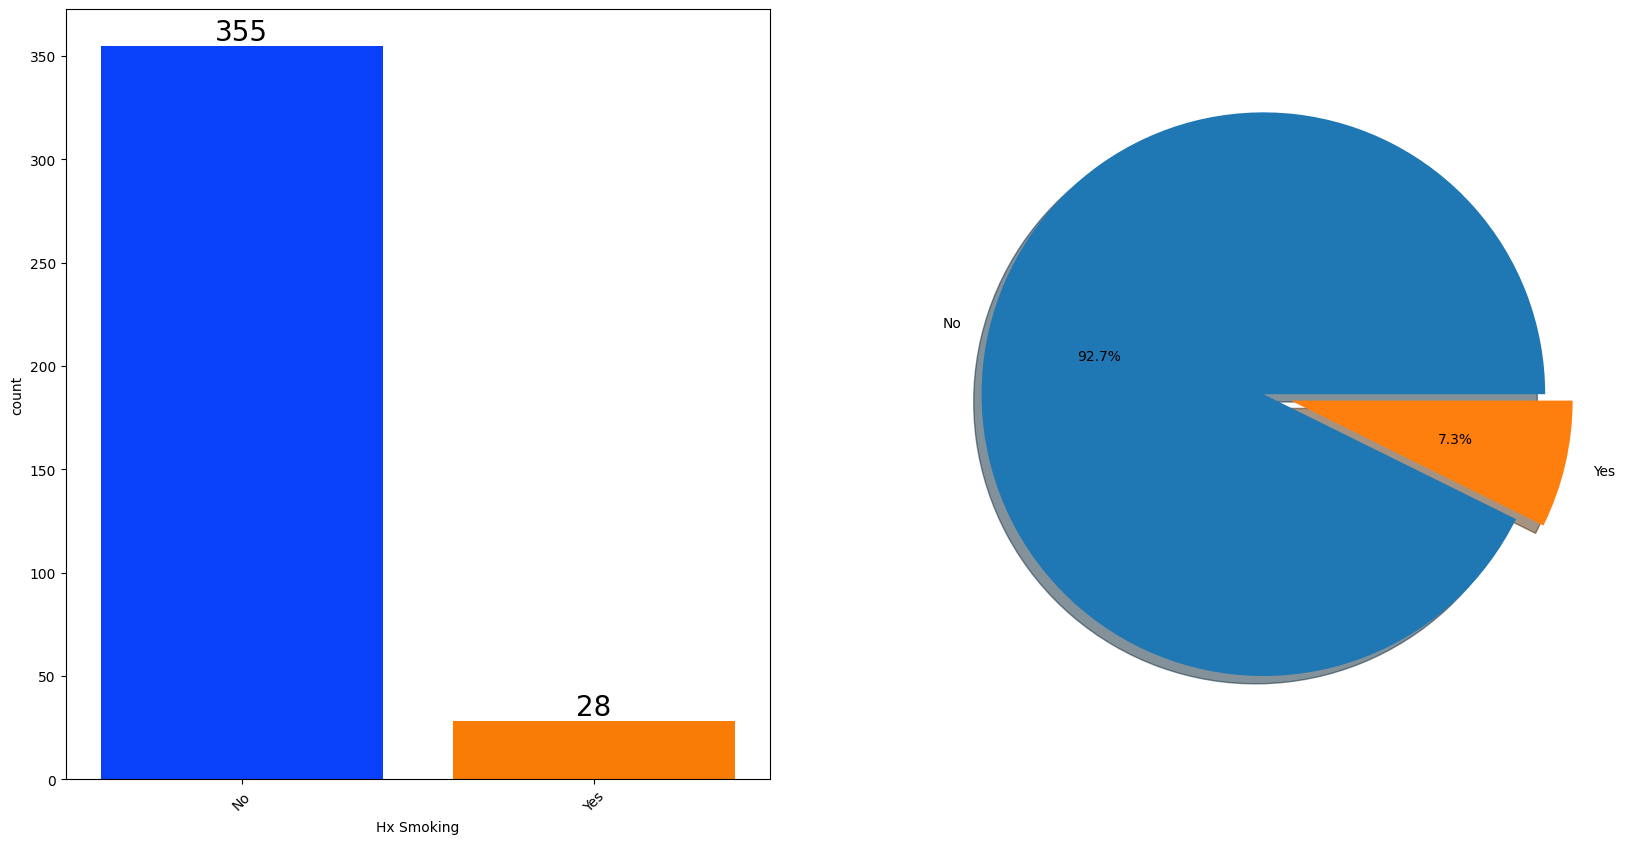

In [61]:
plot_categorical_feature("Hx Smoking", [0,0.1])

#### Insights

The majority of patients in the dataset have no history of smoking (92.7%), while a small portion have a history of smoking (7.3%). This suggests that a history of smoking might not be a prevalent factor influencing thyroid cancer recurrence in this cohort, warranting further investigation into other potential predictors.

### Hx Radiotherapy Distribution


/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


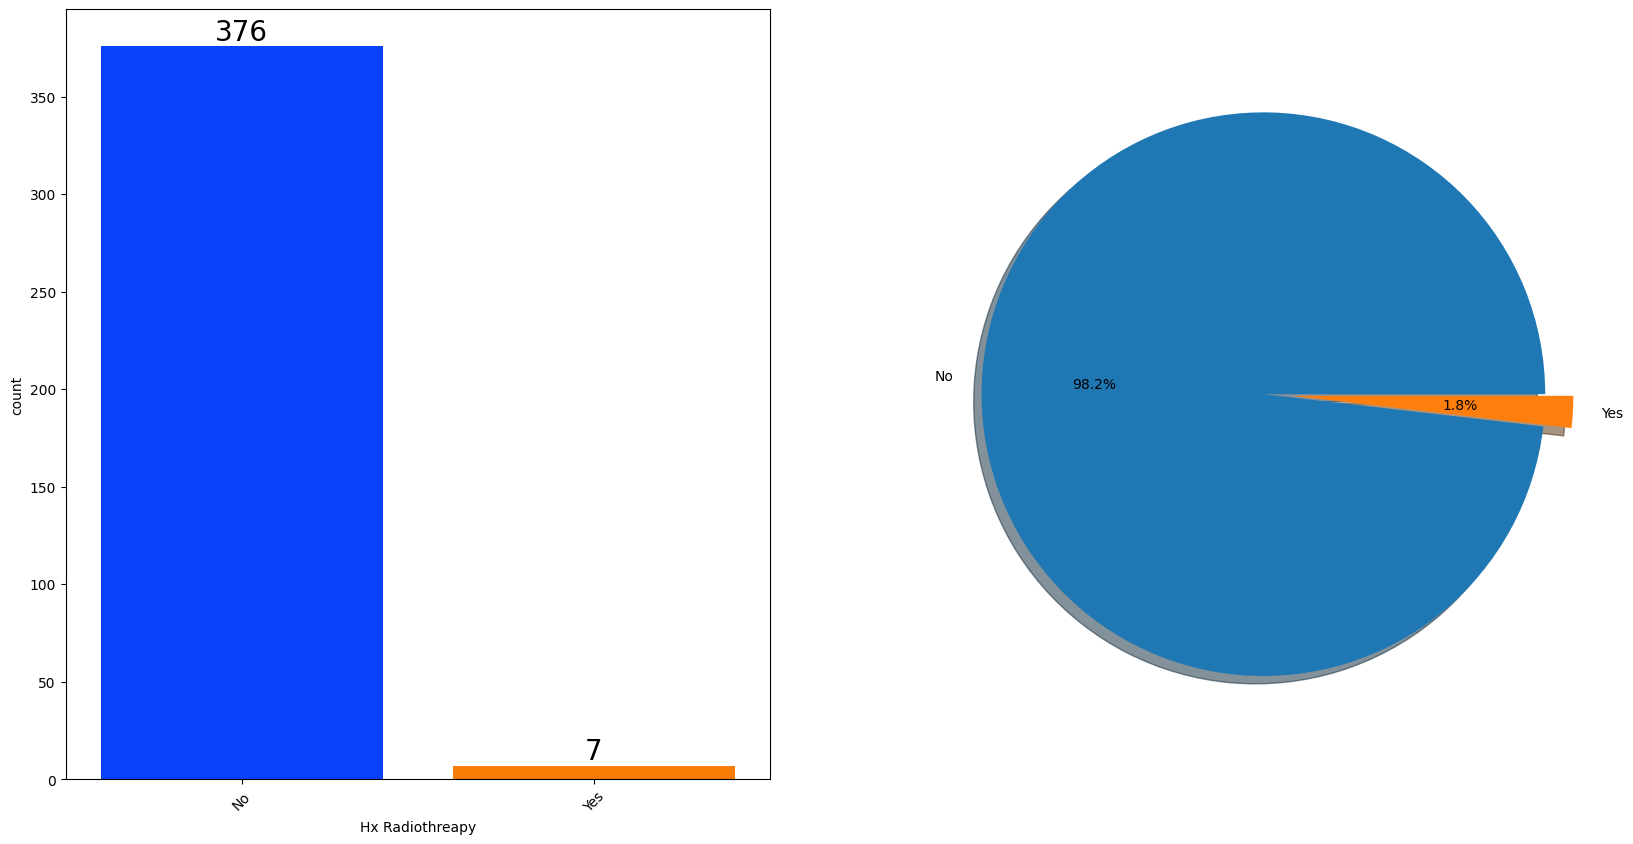

In [64]:
plot_categorical_feature("Hx Radiothreapy", [0,0.1])

#### Insights

The vast majority of patients (98.2%) have no history of radiotherapy, while only a small fraction (1.8%) have undergone radiotherapy. This suggests that radiotherapy might not be a prevalent treatment option for this cohort, potentially indicating other primary treatment modalities or early-stage disease presentation.

### Thyroid Function Distribution



/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

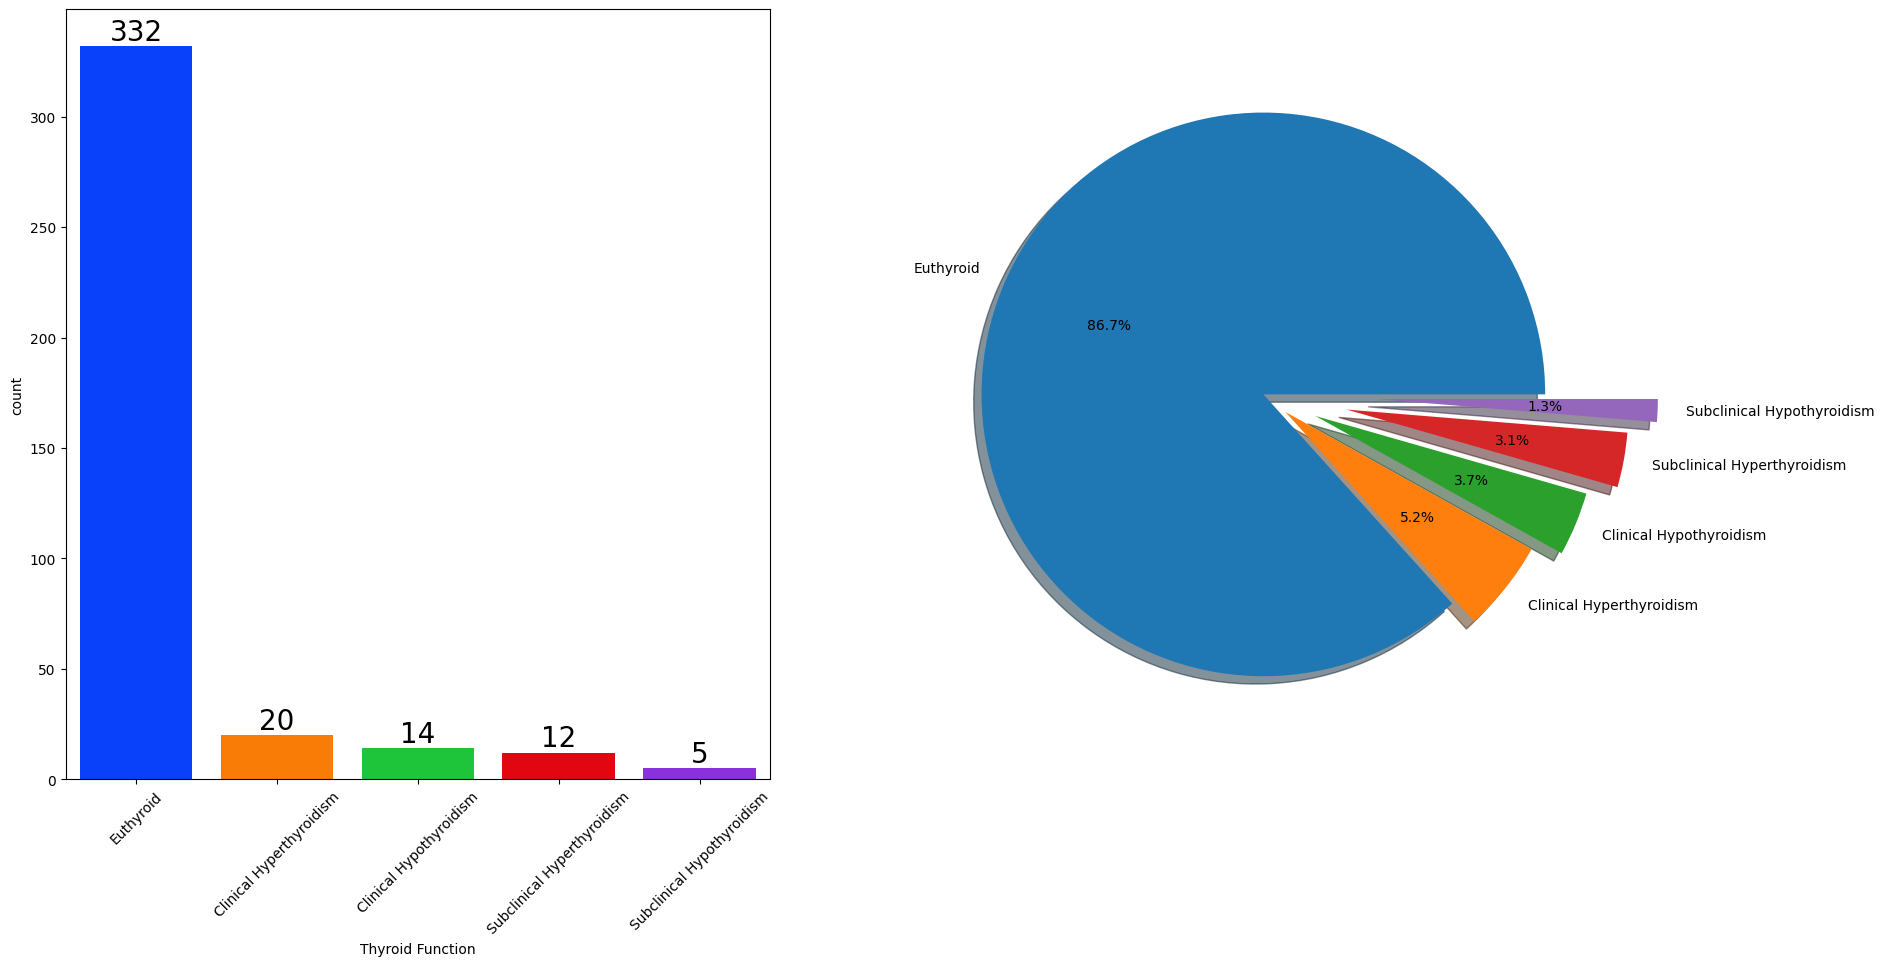

In [65]:
plot_categorical_feature("Thyroid Function", [0, 0.1, 0.2, 0.3, 0.4])

### Physical Examination Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

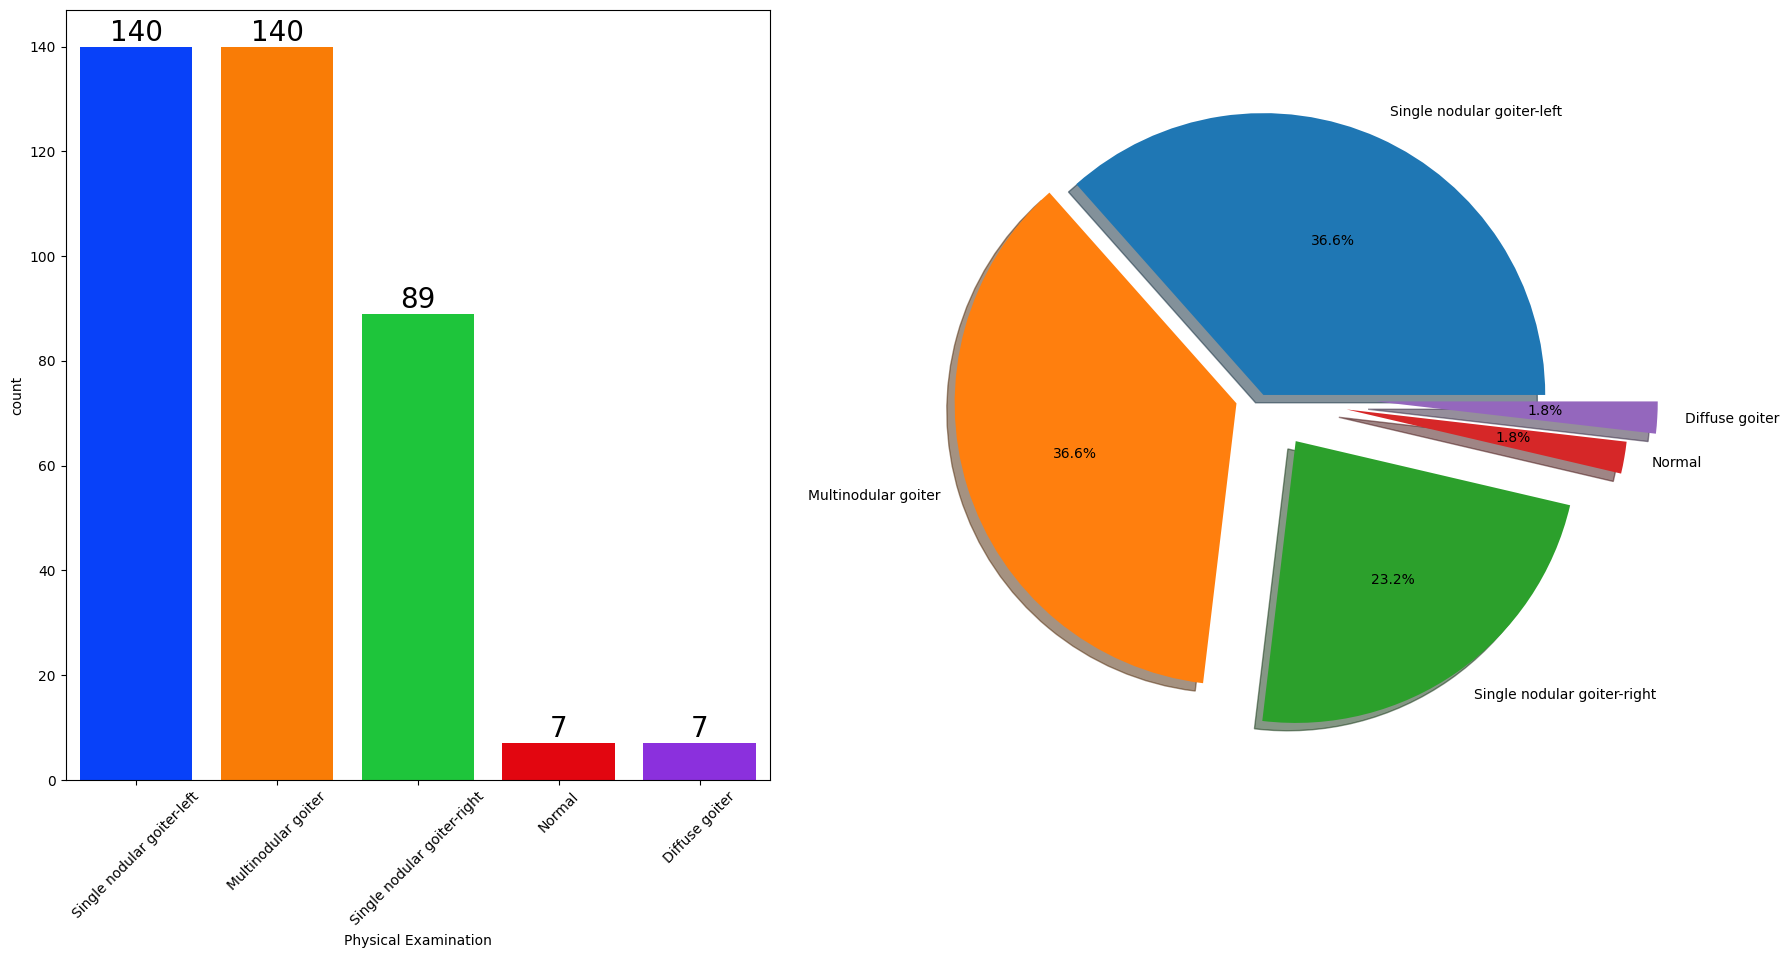

In [66]:
plot_categorical_feature("Physical Examination", [0, 0.1, 0.2, 0.3, 0.4])

#### Insights

The majority of patients exhibit euthyroid status (86.7%), indicating normal thyroid function. Clinical hyperthyroidism and hypothyroidism are less prevalent (5.2% and 3.7% respectively), with subclinical cases even rarer. This suggests thyroid function's potential impact on recurrence risk warrants further investigation, particularly in abnormal cases.

### Adenopathy Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

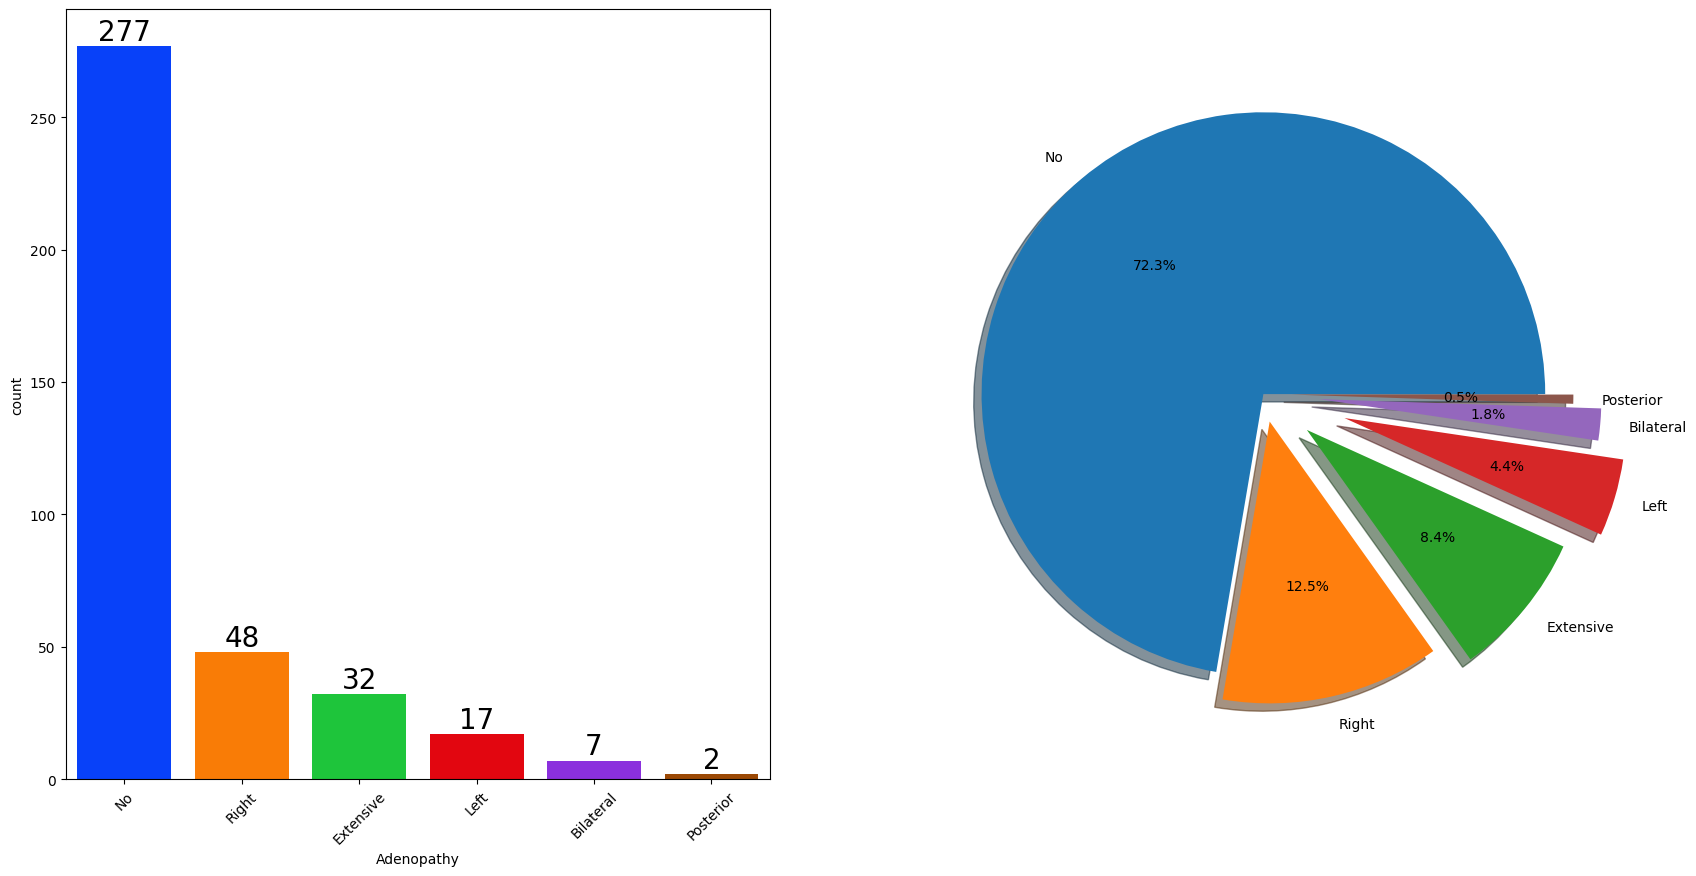

In [67]:
plot_categorical_feature("Adenopathy",[0, 0.1, 0.2, 0.3, 0.2, 0.1])

#### Insights

The majority of patients exhibit no adenopathy (72.3%). Among those with adenopathy, it tends to be asymmetric, with right-sided (12.5%) slightly more common than left-sided (4.4%) or bilateral (1.8%) involvement. Extensive and posterior adenopathy are less frequent (8.4% and 0.5% respectively).

### Pathology Distribution



/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

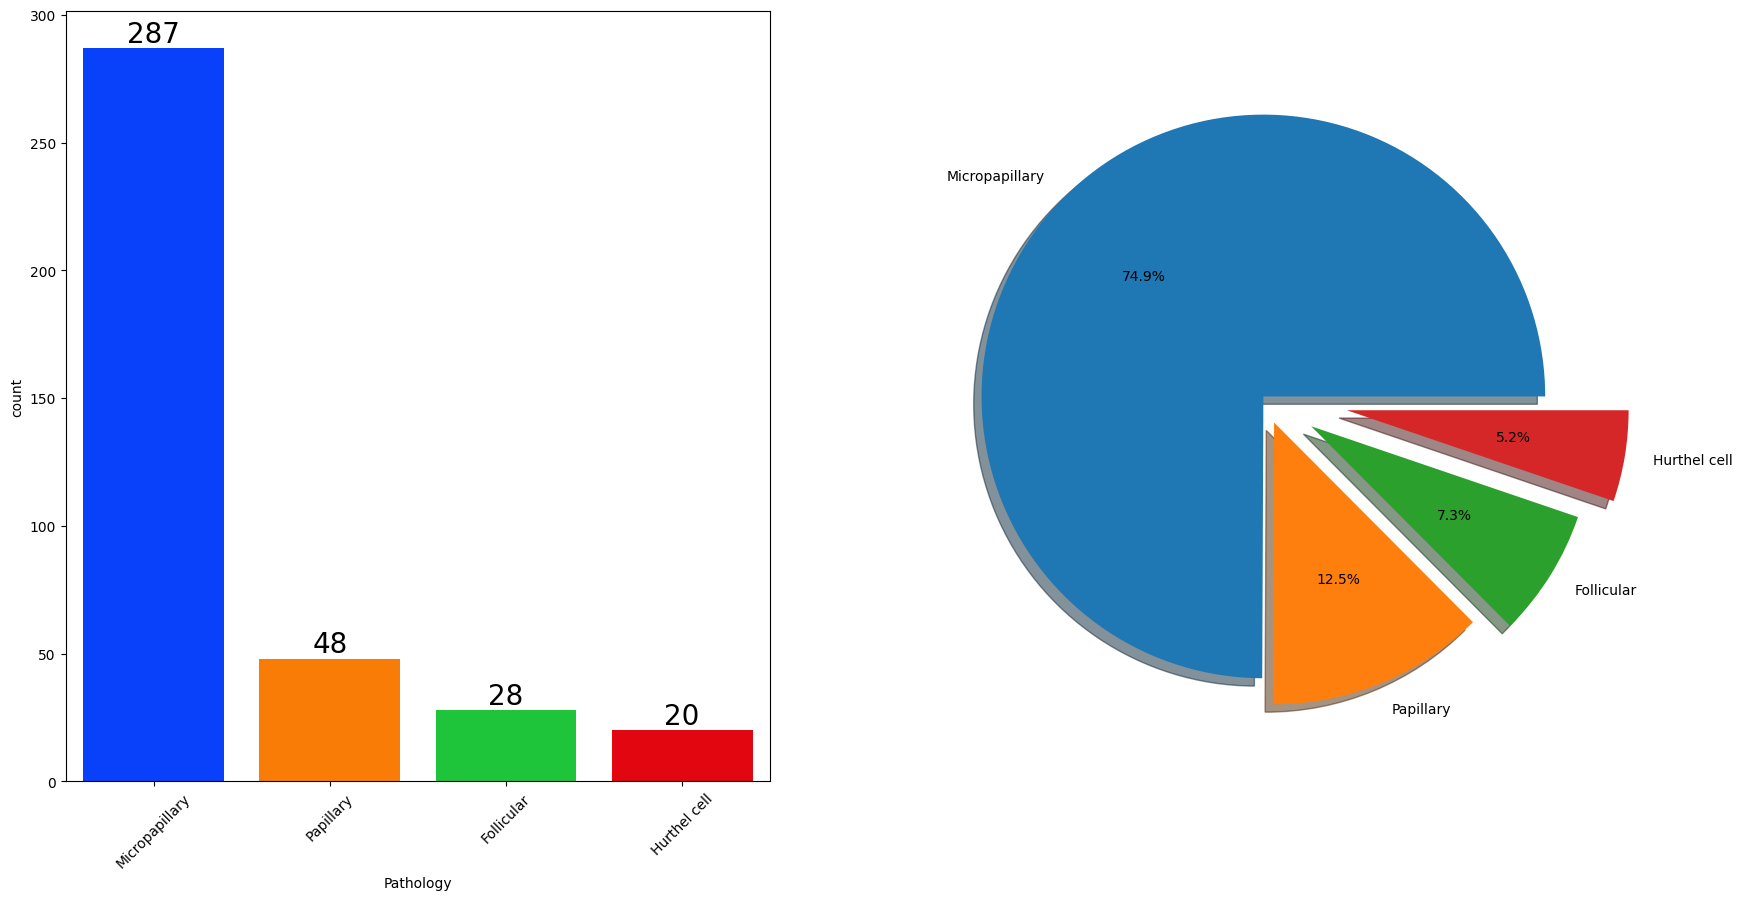

In [68]:
plot_categorical_feature("Pathology",[0, 0.1, 0.2, 0.3])

#### Insights

The majority of patients have micropapillary pathology (74.9%), followed by papillary (12.5%), follicular (7.3%), and Hurthel cell (5.2%) types. Micropapillary pathology is most prevalent, potentially indicating its significance as a subtype in predicting thyroid cancer recurrence compared to other types.

### Focality Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


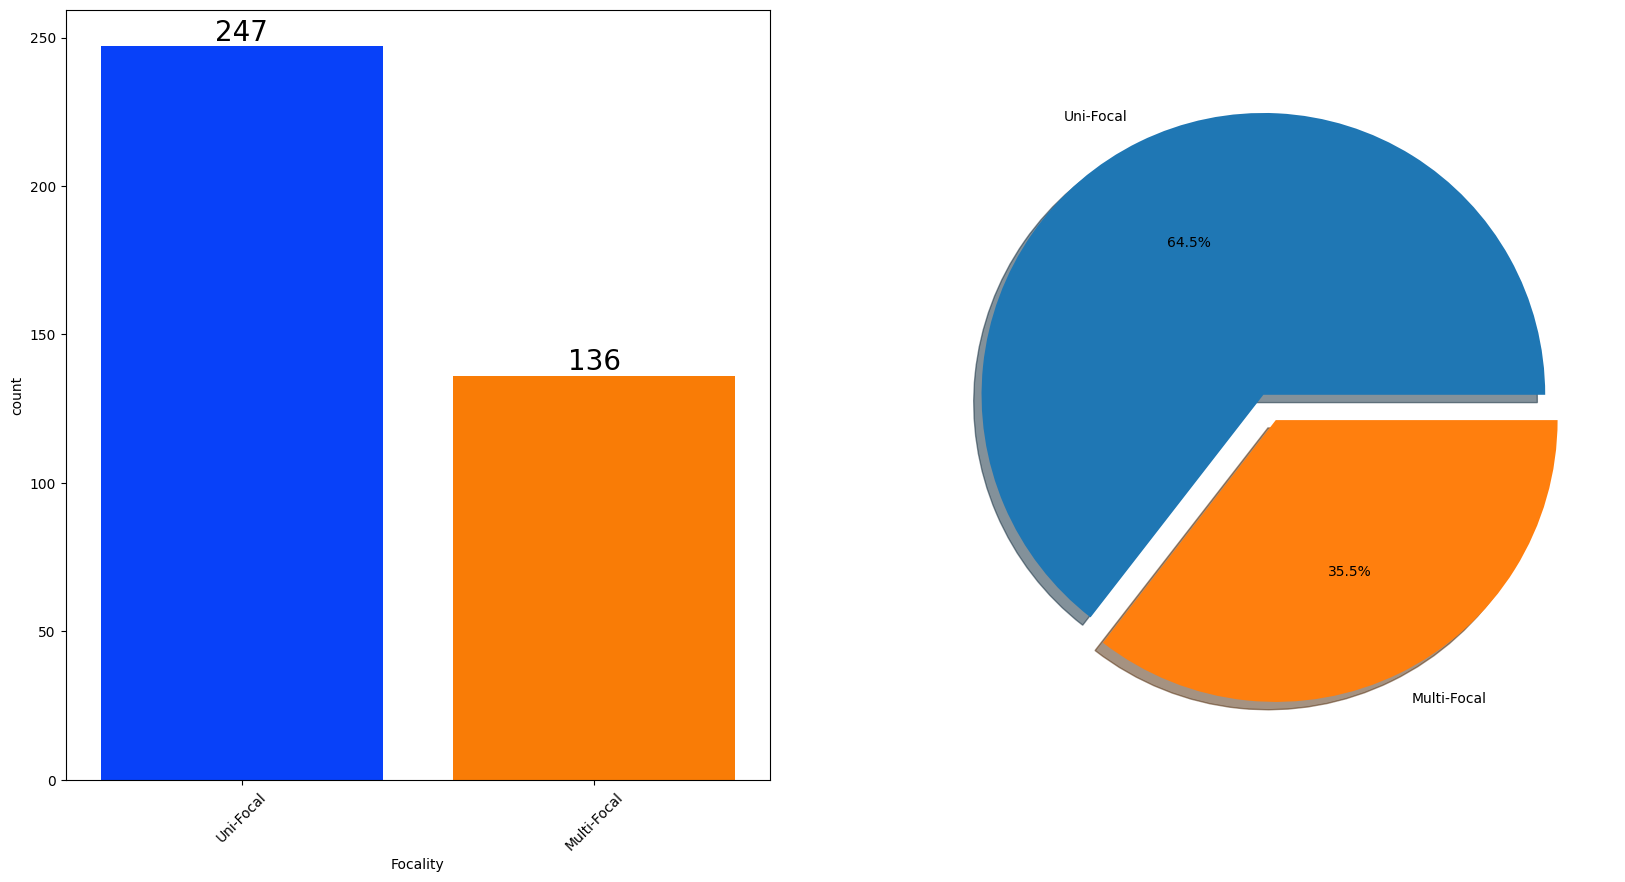

In [69]:
plot_categorical_feature("Focality",[0, 0.1,])

#### Insights

The majority of patients have unifocal thyroid cancer (64.5%), while a significant portion present with multifocal disease (35.5%). This distribution suggests that the tumor's focal pattern may influence the risk of recurrence, indicating a need to consider tumor multifocality in recurrence prediction models.

### Risk Distribution



/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

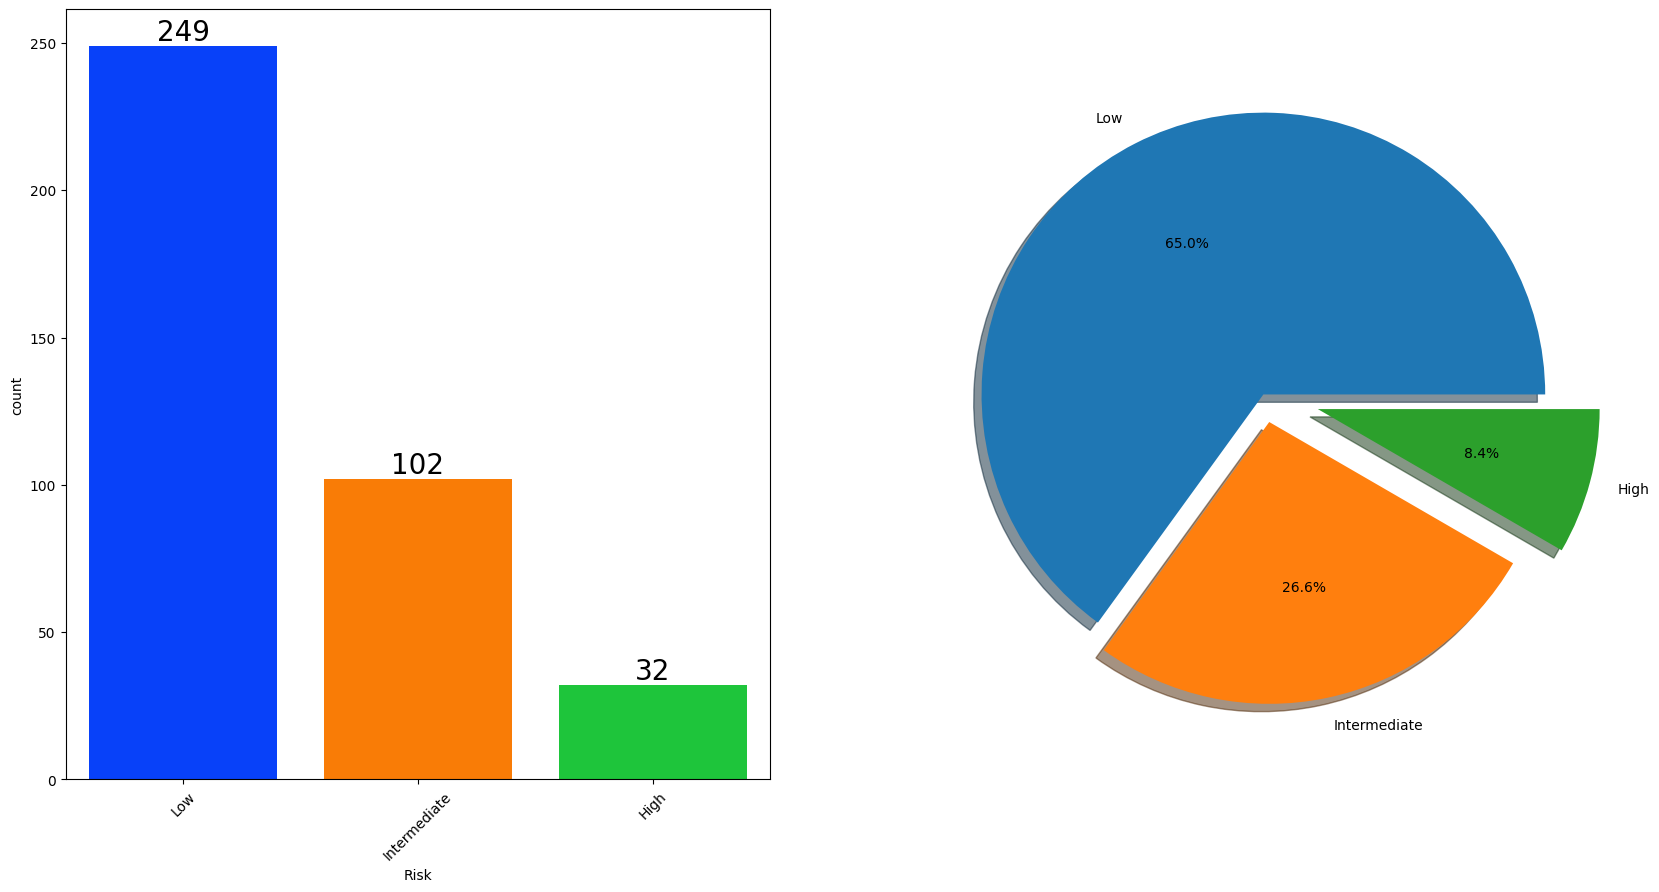

In [70]:
plot_categorical_feature("Risk",[0, 0.1, 0.2])

#### Insights

The majority of patients have a low risk of thyroid cancer recurrence (65%), while a significant portion fall into the intermediate risk category (26.6%). Fewer patients are classified as high risk (8.4%). This stratification suggests the importance of assessing recurrence risk for tailored management strategies.

### T Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

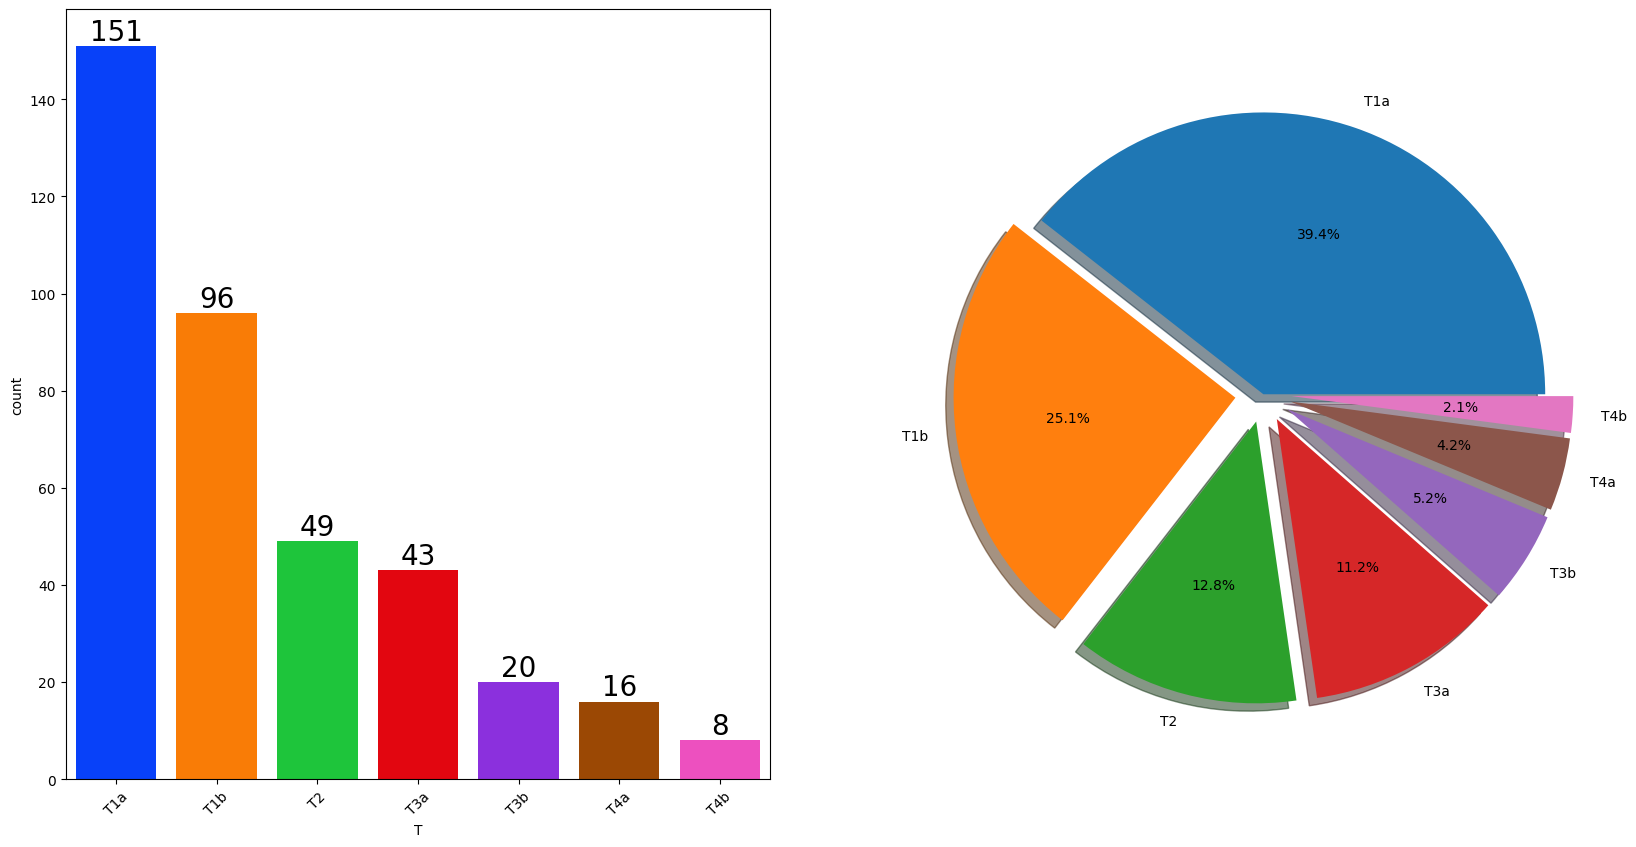

In [73]:
plot_categorical_feature("T",[0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

#### Insights


The majority of patients have early-stage thyroid cancer, with T1a being the most common (39.4%), followed by T1b (25.1%). T2 and T3 stages represent a smaller proportion, indicating that early-stage tumors dominate the cohort, potentially influencing the risk of recurrence

### N Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

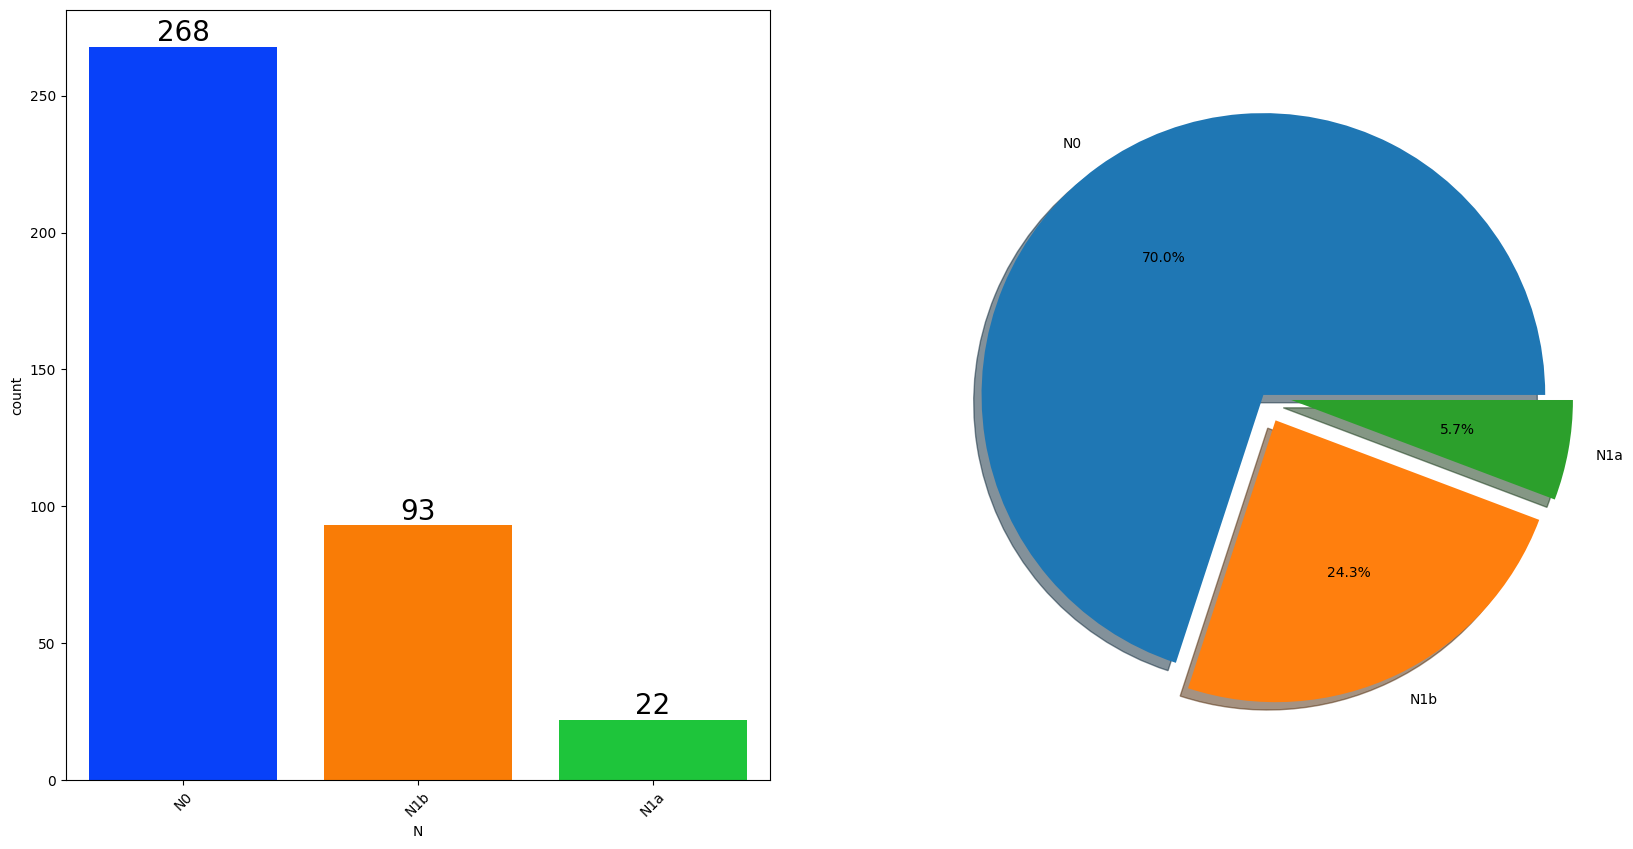

In [74]:
plot_categorical_feature("N", [0, 0.1, 0.1])

#### Insights

The majority of patients are staged as N0 (70.0%), indicating absence of regional lymph node metastasis. However, a notable proportion show metastasis to different levels of lymph nodes: N1b (24.3%) and N1a (5.7%). This highlights the importance of lymph node involvement in predicting thyroid cancer recurrence.

### M Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)


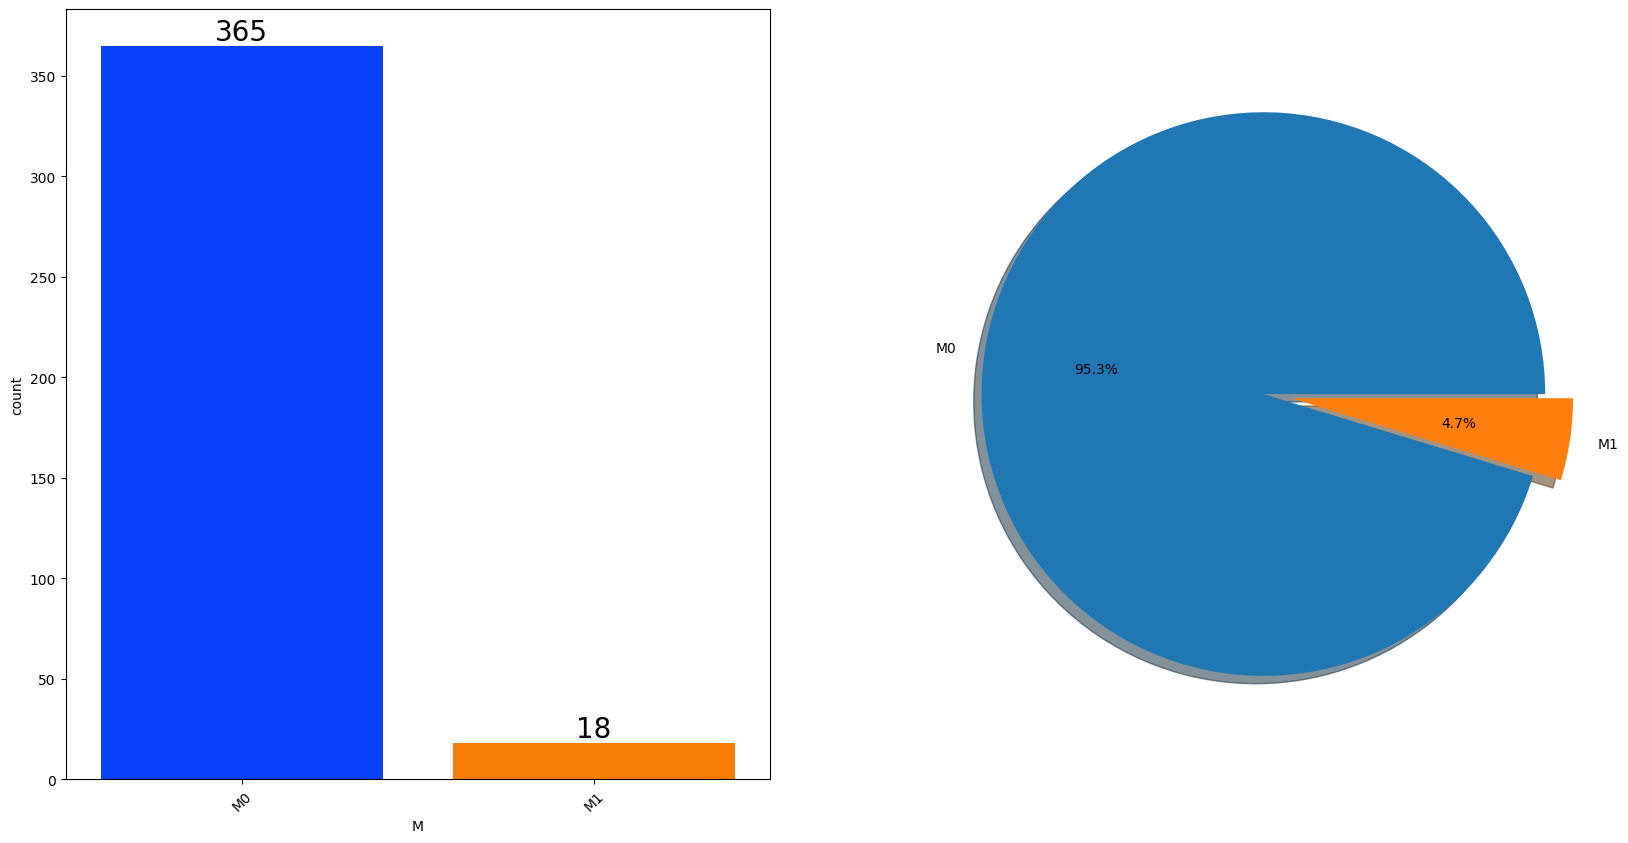

In [75]:
plot_categorical_feature("M", [0, 0.1, ])

#### Insights

The majority of patients are categorized as M0 (95.3%), indicating absence of distant metastasis. A small proportion are classified as M1 (4.7%), suggesting distant metastasis presence. The low percentage of M1 cases underscores the importance of monitoring for distant metastases in thyroid cancer recurrence prediction models.

### Stage Distribution

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

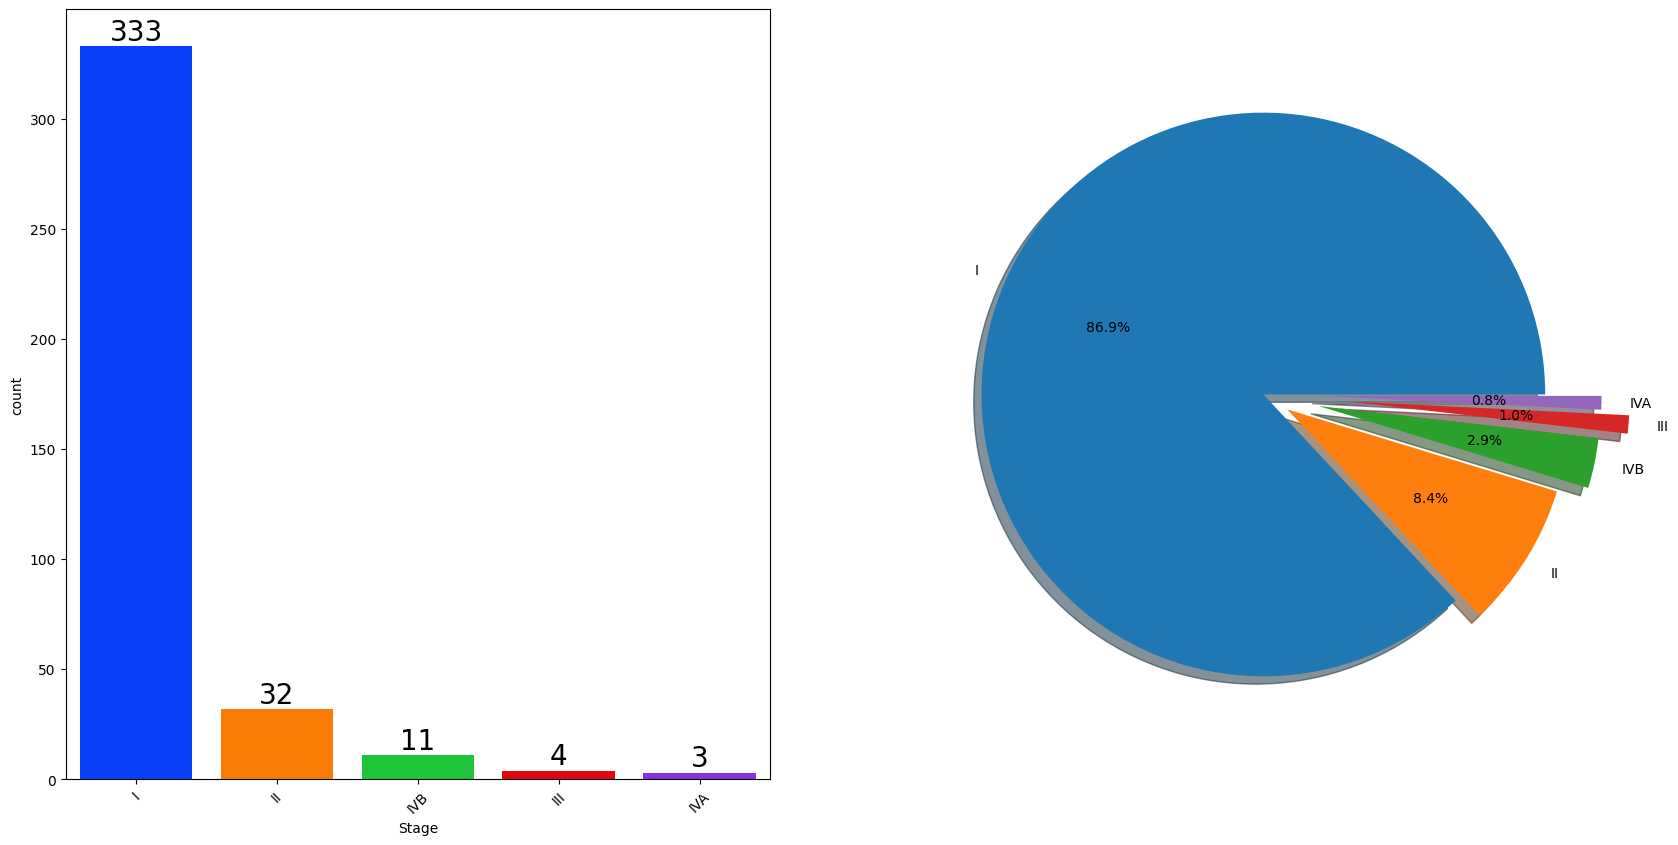

In [76]:
plot_categorical_feature("Stage", [0, 0.1, 0.2, 0.3, 0.2])

#### Insights

The majority of patients are at Stage I (86.9%), indicating an early cancer stage. This suggests that the majority of patients in the study have a favorable prognosis regarding recurrence. However, there are still notable proportions in higher stages, emphasizing the need for personalized surveillance and management strategies.

### Response

'Indeterminate', 'Excellent', 'Structural Incomplete', 'Biochemical Incomplete'

/tmp/ipykernel_923/211001294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature_name],data=df,palette ='bright',ax=ax[0],saturation=0.95, order=df[feature_name].value_counts().index)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=df[feature_name].unique(), rotation=45)
/tmp/ipykernel_923/211001294.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xtic

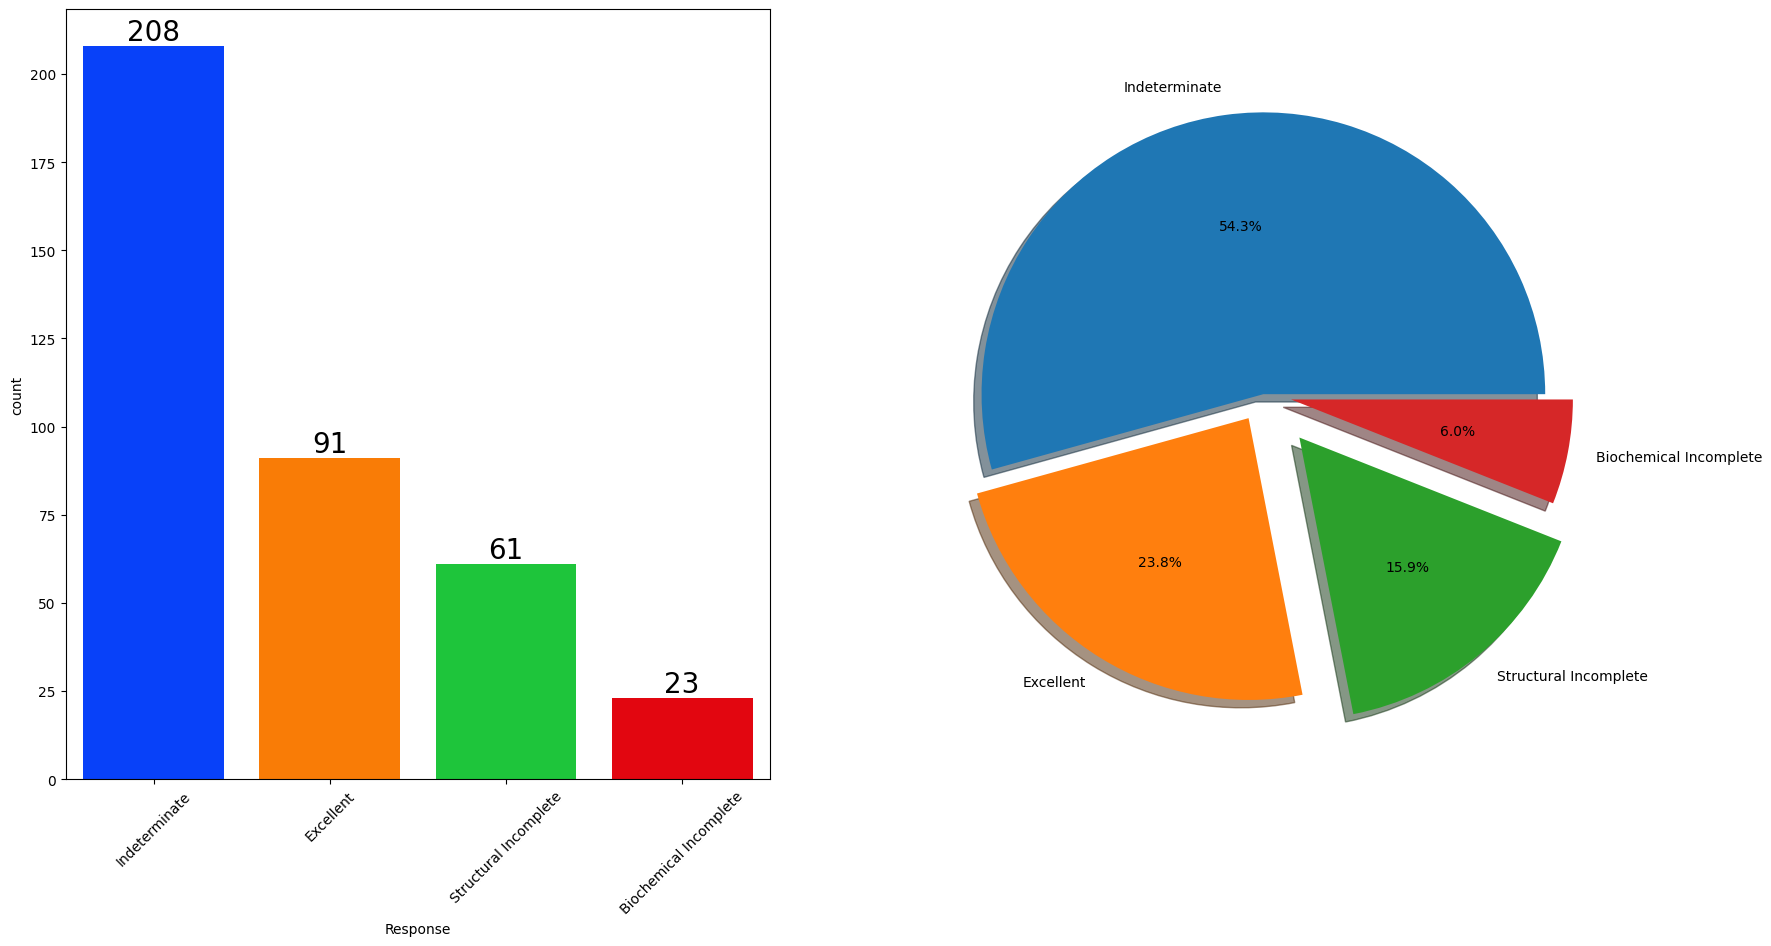

In [77]:
plot_categorical_feature("Response", [0, 0.1, 0.2, 0.1])

#### Insights

The majority of patients have an indeterminate response regarding recurrence (54.3%), followed by excellent (23.8%), structural incomplete (15.9%), and biochemical incomplete (6.0%) responses. This highlights the challenge in predicting recurrence, indicating the importance of accurate risk assessment for appropriate management strategies.

In [27]:
# Created a dictionary of all columns class distribution
columns = df.columns
feature_distributions = {}
for col in columns:
    distribution = df.groupby(col).size()
    feature_distributions[col] = distribution
    

## Exploring Class Distribution

In [28]:
# Target class distribution
target_distribution = df.groupby('Recurred').size()
target_distribution

Recurred
No     275
Yes    108
dtype: int64

We can see that there is more than half of the observations with the class Yes compared with No, so our dataset is imbalanced. This will have to be considered when preparing for modelling.

## 4. Multivariate Analysis

## 5. Feature Selection

#### References

Borzooei, S., Briganti, G., Golparian, M. et al. Machine learning for risk stratification of thyroid cancer patients: a 15-year cohort study. Eur Arch Otorhinolaryngol (2023). https://doi.org/10.1007/s00405-023-08299-w